# Multi-Layer Perceptron - TensorFlow Keras

In this scenario of **Deep Learning** you will be constructing a **Multi-Layer Perceptron using Tensorflow keras**.This model will then be trained to predict the classes of wine dataset provided. 

### Import the required packages

In [1]:
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from IPython.display import Image
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score


### Load the Dataset

In [2]:
# Dataset to be stored in a Pandas Dataframe
data_path = './wine.csv'
df = pd.read_csv(data_path)
df.shape


(6497, 13)

### Function to Label Encode 

In [3]:
#Function to encode the given array values using label Encoder
def encoding(values):

    '''
    Input: Array to be encoded
    output: Encoded Array
    '''

  #------------START CODE---------

  #create an object of Label Encoder
    enc=LabelEncoder()

  #fit transform the values and return 

    transformed_values=enc.fit_transform(values)

  #-----------END CODE------------------
    return transformed_values


### Preprocess

In [4]:
def pre_process(df):
    '''
    Input: Dataframe
    output: Pre-processed Data frame after removing null values and encoding labels
    '''
    #----------START CODE----------

    #Remove null value with inplace parameter set to "True"
    df.dropna(inplace=True)

    #1.Encode the "type" labels of dataframe to 1 and 0 with LabelEncoder (White:1, Red:0) 
    #2.add the transformed values to a new column named "color" to the dataframe
    #3.Note: Use the function "encoding" defined above
    y=encoding(df['type'])
    df['color'] = y
    


    #-------------END CODE----------
    return df

### Standard Scaler



In [5]:
#function to scale the values
def scaler(X):

    '''
    Input:Input Features to be transformed
    Output:scaled features

    '''
    #-------------START CODE---------


    #Create an object of standard scaler
    scaler=StandardScaler().fit(X)

    #Fit transform and return
    x=scaler.fit_transform(X)

    #--------END CODE--------------
    return x




### Split the Dataset

In [6]:
def split_scale(df):
    '''
    Input: Preprocessed Dataframe
    Output: Training and testing set scaled 
    '''

    #------------------START CODE-----------------


    #shuffle the dataframe with the old index dropped
#     df = df.sample(frac=1).reset_index(drop=True)

    #1.consider "color" values as labels (Y)
    #2.drop the columns "type" and "color" from features X 
    Y= df['color']
    X= df.drop(['color','type'] , axis=1)

    #Split the data with the train_test_split function of sklearn with parameters test_size=0.2 and random_state=101
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8,test_size = 0.2, random_state=101)

    #Scale X_train and X_test with "scaler" function defined
    X_train=scaler(X_train)
    X_test=scaler(X_test)

    #------------------END CODE-----------

    return (X_train, X_test, y_train, y_test)




### Create the MLP model

In [7]:
def model_mlp():   
    """
    Construct a fully-connected network structure defined using dense class
    Create a sequential model
    Use adam optimizer, binary cross entropy and accuracy as metrics for compiling the model
    Return the compiled model

    ----------------------------------
    1.The model expects rows of data with 12 variables (the input_dim=12 argument)
    2.The first hidden layer has 64 nodes and uses the relu activation function.
    3.The second hidden layer has 32 nodes and uses the relu activation function.
    3.The third hidden layer has 16 nodes and uses the relu activation function.
    4.The output layer has one node and uses the sigmoid activation function.
    """

    model = Sequential()
    model.add(Dense(64, input_shape=(12,),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


    return model


### Time to call the functions

In [8]:

#------------------------TRAINING-------------------------
#call the pre_process function with dataframe as parameter
processed_df=pre_process(df)

#Split the preprocessed dataframe using split_scale function
X_train, X_test, y_train, y_test=split_scale(processed_df)

#Return the compiled model
model=model_mlp()

no_of_epochs=40

#fit the model with X_train, y_train, epochs=40, batch_size=50,shuffle=true,validation_split=0.2,verbose=1 and return the history
history = model.fit(X_train, y_train,batch_size=50,epochs=40,validation_split=0.2, shuffle=True,verbose=1)


# #Extract the parameters from history to plot them
val_loss = history.history['val_loss']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
acc= history.history['accuracy']

#---------------------PREDICTION----------------------------------
#Predict the classes for X_test using the compiled model. Hint:Use predict_classes
# y_pred = model.predict(X_test)
# y_pred=np.argmax(y_pred,axis=-1)
y_pred = model.predict_classes(X_test)




Epoch 1/40
83/83 [==============================] - 1s 5ms/step - loss: 0.2389 - accuracy: 0.9497 - val_loss: 0.0370 - val_accuracy: 0.9903
Epoch 2/40
83/83 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9925 - val_loss: 0.0197 - val_accuracy: 0.9942
Epoch 3/40
83/83 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9952 - val_loss: 0.0154 - val_accuracy: 0.9971
Epoch 4/40
83/83 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9959 - val_loss: 0.0138 - val_accuracy: 0.9981
Epoch 5/40
83/83 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9961 - val_loss: 0.0137 - val_accuracy: 0.9971
Epoch 6/40
83/83 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.0119 - val_accuracy: 0.9990
Epoch 7/40
83/83 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9961 - val_loss: 0.0107 - val_accuracy: 0.9990
Epoch 8/40
83/83 [==

### Run the below cell to visualise the plot of model history parameters

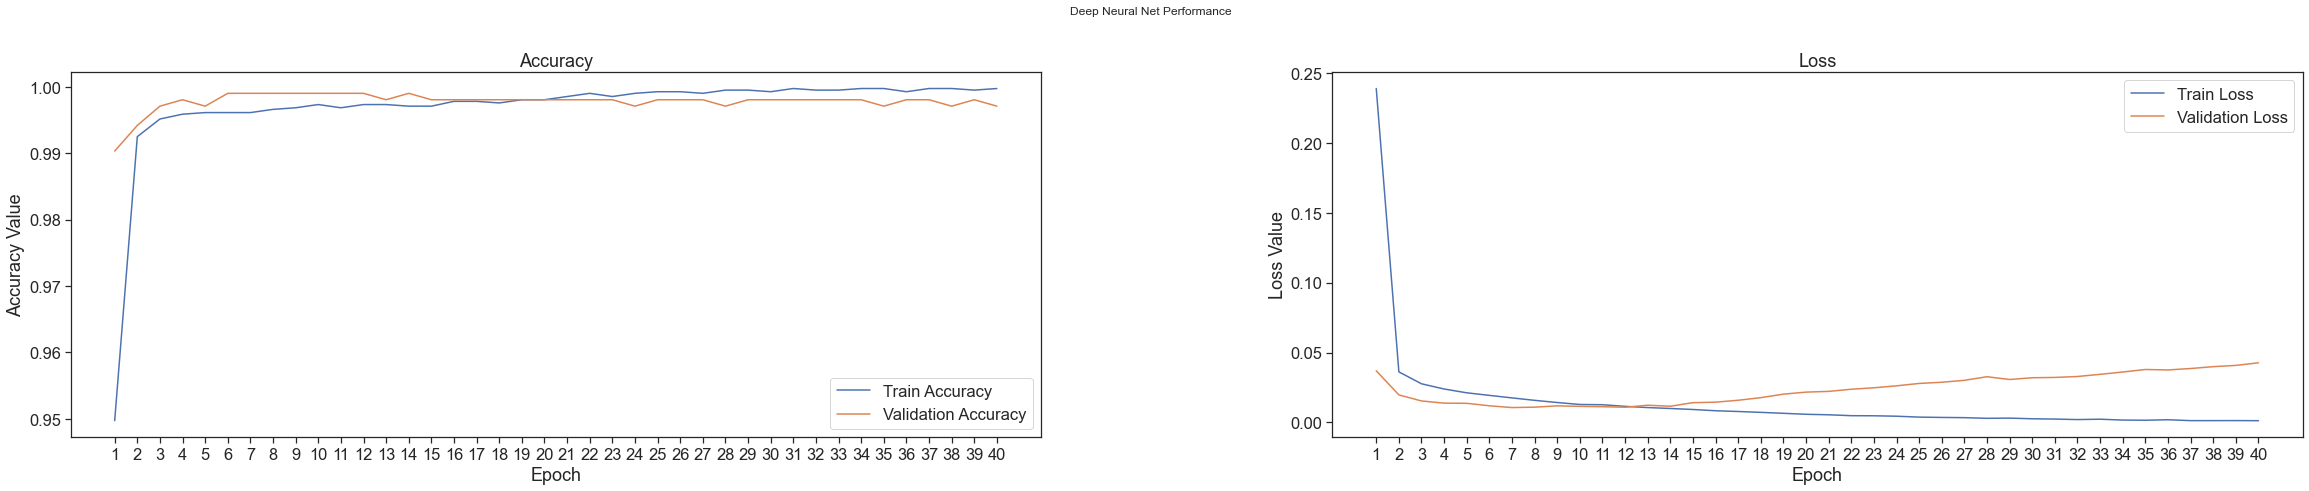

In [9]:
# plot your history
#plot 1:Training accuracy vs validation accuracy
#plot2 : Train Loss vs Validation Accuracy

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 7))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,no_of_epochs+1))
ax1.plot(epochs,acc, label='Train Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs,loss, label='Train Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#### Run the below cell to know the metrics and classification report

In [11]:



def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def display_confusion_matrix(true_labels, predicted_labels):
    
    
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    tn, fp, fn, tp=metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels).ravel()
    


    cm_frame = pd.DataFrame(data=cm, 
                            columns=[0,1], 
                            index=[0,1]) 
    cm_frame1=pd.DataFrame(data=cm, 
                            columns=['Red','White'], 
                            index=['Red','White']) 
    print(cm_frame) 

    print(cm_frame1)
    
    
def display_classification_report(true_labels, predicted_labels):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels)

def get_results(model, name, data, true_labels, predicted_labels, results=None, reasume=False):
  
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels)
    

    

get_results(model, 'DNN Regressor', X_test, y_test,y_pred,reasume=False)



Model Performance metrics:
------------------------------
Accuracy:  24.98% 
Precision: 6.24% 
Recall:    24.98% 
F1 Score:  9.99% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       323
           1       0.00      0.00      0.00       970

    accuracy                           0.25      1293
   macro avg       0.12      0.50      0.20      1293
weighted avg       0.06      0.25      0.10      1293


Prediction Confusion Matrix:
------------------------------
     0  1
0  323  0
1  970  0
       Red  White
Red    323      0
White  970      0


c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star